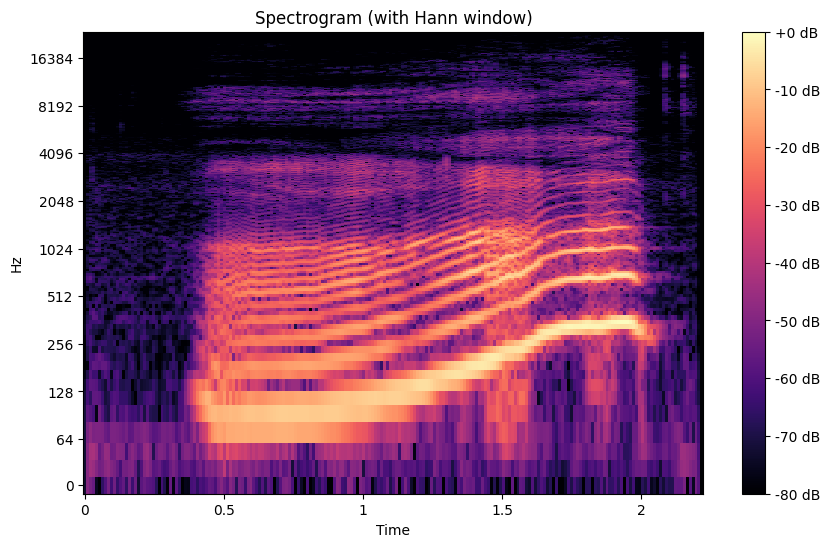

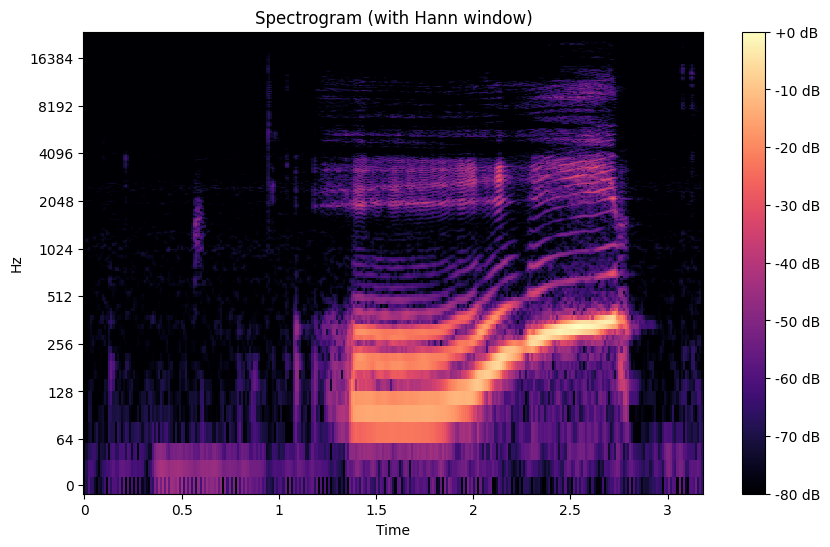

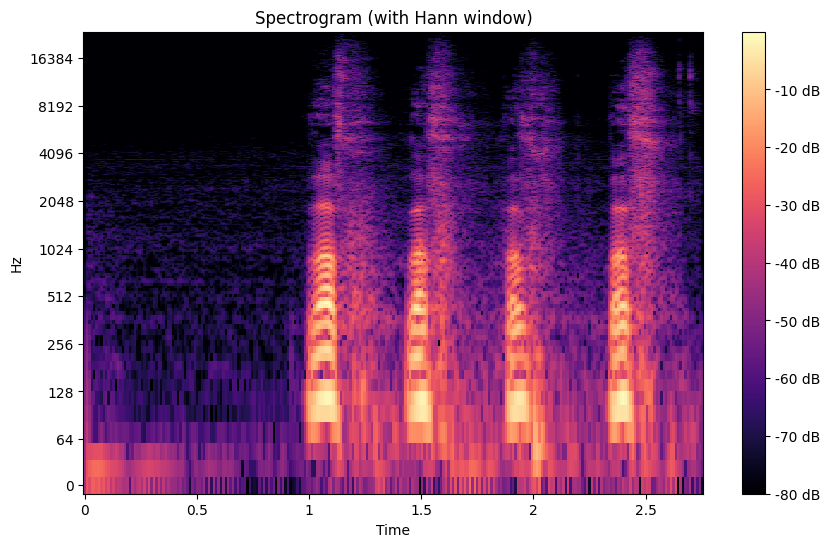

In [7]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def plot_spectrogram(audio_path, output_image_path):
    y, sr = librosa.load(audio_path, sr=None)

   
    n_fft = 2048
    hop_length = 512
    window = 'hann'

    
    D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length, window=window))

    
    DB = librosa.amplitude_to_db(D, ref=np.max)

    
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram (with Hann window)')
    plt.savefig(output_image_path)
    plt.show()


plot_spectrogram('input/aaaa.wav', 'a_spectrogram.png')
plot_spectrogram('input/iiii.wav', 'i_spectrogram.png')
plot_spectrogram('input/bark.wav', 'bark_spectrogram.png')

In [8]:
def find_min_max_frequency(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    
    n_fft = 2048
    hop_length = 512
    D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    freqs = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
    DB = librosa.amplitude_to_db(D, ref=np.max)
    
    
    nonzero_freqs = freqs[np.max(DB, axis=1) > -80] 
    min_freq = np.min(nonzero_freqs)
    max_freq = np.max(nonzero_freqs)
    
    return min_freq, max_freq


min_freq_a, max_freq_a = find_min_max_frequency('input/aaaa.wav')
min_freq_i, max_freq_i = find_min_max_frequency('input/iiii.wav')
min_freq_bark, max_freq_bark = find_min_max_frequency('input/bark.wav')

print(f"Min and Max Frequency for 'A': {min_freq_a} Hz, {max_freq_a} Hz")
print(f"Min and Max Frequency for 'I': {min_freq_i} Hz, {max_freq_i} Hz")
print(f"Min and Max Frequency for Bark: {min_freq_bark} Hz, {max_freq_bark} Hz")


Min and Max Frequency for 'A': 0.0 Hz, 23882.8125 Hz
Min and Max Frequency for 'I': 0.0 Hz, 21890.625 Hz
Min and Max Frequency for Bark: 0.0 Hz, 24000.0 Hz


In [9]:
def find_most_tonal_frequency(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    
    n_fft = 2048
    hop_length = 512
    D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    DB = librosa.amplitude_to_db(D, ref=np.max)
    
    
    harmonic_freqs = librosa.yin(y, fmin=50, fmax=2000, sr=sr, hop_length=hop_length)
    harmonic_counts = np.histogram(harmonic_freqs, bins=np.arange(0, sr // 2, 50))[0]
    most_tonal_frequency = np.argmax(harmonic_counts) * 50
    
    return most_tonal_frequency


tonal_freq_a = find_most_tonal_frequency('input/aaaa.wav')
tonal_freq_i = find_most_tonal_frequency('input/iiii.wav')
tonal_freq_bark = find_most_tonal_frequency('input/bark.wav')

print(f"Most Tonal Frequency for 'A': {tonal_freq_a} Hz")
print(f"Most Tonal Frequency for 'I': {tonal_freq_i} Hz")
print(f"Most Tonal Frequency for Bark: {tonal_freq_bark} Hz")


Most Tonal Frequency for 'A': 50 Hz
Most Tonal Frequency for 'I': 50 Hz
Most Tonal Frequency for Bark: 50 Hz


In [10]:
def find_formants(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    n_fft = 2048
    hop_length = 512
    D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    DB = librosa.amplitude_to_db(D, ref=np.max)

    freqs = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
    time_steps = librosa.frames_to_time(np.arange(D.shape[1]), sr=sr, hop_length=hop_length)
    
    
    formants = []
    for t in range(0, len(time_steps), int(0.1 * sr / hop_length)):
        spectrum_slice = DB[:, t]
        peak_indices = np.argpartition(spectrum_slice, -3)[-3:] 
        formant_frequencies = freqs[peak_indices]
        formants.append(formant_frequencies)
    
    return formants


formants_a = find_formants('input/aaaa.wav')
formants_i = find_formants('input/iiii.wav')
formants_bark = find_formants('input/bark.wav')

print(f"Formants for 'A': {formants_a}")
print(f"Formants for 'I': {formants_i}")
print(f"Formants for Bark: {formants_bark}")


Formants for 'A': [array([117.1875,  93.75  ,  70.3125]), array([46.875 , 70.3125, 23.4375]), array([656.25  ,  46.875 ,  70.3125]), array([375.    ,  46.875 ,  70.3125]), array([ 93.75  , 140.625 , 117.1875]), array([187.5   ,  70.3125,  93.75  ]), array([117.1875,  70.3125,  93.75  ]), array([117.1875,  93.75  ,  70.3125]), array([ 70.3125, 117.1875,  93.75  ]), array([187.5   , 117.1875,  93.75  ]), array([632.8125,  93.75  , 117.1875]), array([140.625 ,  93.75  , 117.1875]), array([1031.25  ,  140.625 ,  117.1875]), array([117.1875, 140.625 , 164.0625]), array([679.6875, 187.5   , 164.0625]), array([796.875 , 210.9375, 187.5   ]), array([914.0625, 679.6875, 234.375 ]), array([257.8125, 304.6875, 281.25  ]), array([656.25  , 304.6875, 328.125 ]), array([351.5625, 328.125 , 679.6875]), array([328.125 , 703.125 , 351.5625]), array([281.25  , 328.125 , 304.6875]), array([328.125 , 351.5625, 304.6875]), array([46.875 , 23.4375,  0.    ])]
Formants for 'I': [array([ 8015.625 ,  8039.0625